# The detailed demonstration of the tropical rainfall diagnostic for ICON data: 
# Graphical representation of the histograms 

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Calculation of histogram of precipitation/tropical precipitation](#2-calculation-of-histogram-of-precipitationtropicalprecipitation)

3. [Graphical representation of the histograms](#4-histograms-of-tropical-precipitationn)

    3.1 [Different styles of plots](#41-different-styles-of-plots)

    3.1.1 [Histogram of counts with a smooth line style](#311-histogram-of-counts-with-a-smooth-linestyle-smooth--true)

    3.1.2 [Histogram of counts with a step line style](#312-histogram-of-counts-with-a-step-linestyle-step--true)

    3.2  [ Saving the figure to the storage](#32-saving-the-figure-to-the-storage)

    3.3 [ Plotting the histogram of the counts, frequency, and pdf](#33-plotting-the-histogram-of-counts-frequency-and-pdf)


[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [17]:
from aqua import Reader
from tropical_rainfall import Tropical_Rainfall

#### ICON data

In [18]:
reader = Reader(model="ICON", exp="historical-1990", source="lra-r100-monthly")
icon = reader.retrieve() 

2024-04-16 21:18:34 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 72
  result = blockwise(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 72
  result = blockwise(


## 2. Calculation of histogram of tropical precipitation


##### Initializing the class object with the following attributes: 
 - `num_of_bins`
 - `first_edge`
 - `width_of_bin`

In [19]:
diag = Tropical_Rainfall(num_of_bins=20, first_edge=0, width_of_bin=5)

####  The tropical latitude band, by default, is the following

In [20]:
hist_icon  = diag.histogram(icon)
hist_icon

<xarray.Dataset> Size: 960B
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 160B 2.5 7.5 12.5 ... 87.5 92.5 97.5
    width          (center_of_bin) float64 160B 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0
Data variables:
    counts         (center_of_bin) float64 160B 1.235e+06 5.191e+05 ... 1.0 0.0
    frequency      (center_of_bin) float64 160B 0.5804 0.244 ... 4.7e-07 0.0
    pdf            (center_of_bin) float64 160B 0.1161 0.0488 ... 9.4e-08 0.0
    pdfP           (center_of_bin) float64 160B 0.2902 0.366 ... 8.695e-06 0.0
Attributes:
    history:                \n2024-04-16 21:18:42 AQUA💧: Retrieved from ICON_...
    time_band:              1990-01-01T00:00:00.000000000, 2006-05-01T00:00:0...
    lat_band:               -14.5, 14.5, freq=1.0
    lon_band:               0.0, 359.0, freq=1.0
    time_band_history:      1990-01-01T00:00:00.000000000, 2006-05-01T00:00:0...
    units:                  mm/day
    mean_of_original_data:  5.143757961054234
    mean_of_histogram:      5.88433681143072
    relative_discrepancy:   -14.397622438375798

#### Initialization of diagnostic with a log spaced bins

In [21]:
bins = [1.00000000e-09, 1.63789371e-09, 2.68269580e-09, 4.39397056e-09,
        7.19685673e-09, 1.17876863e-08, 1.93069773e-08, 3.16227766e-08,
        5.17947468e-08, 8.48342898e-08, 1.38949549e-07, 2.27584593e-07,
        3.72759372e-07, 6.10540230e-07, 1.00000000e-06]

In [22]:
diag = Tropical_Rainfall(bins=bins)

In [23]:
hist_icon_trop_logspaced  = diag.histogram(icon)
hist_icon_trop_logspaced

2024-04-16 21:18:43 :: Trop. Rainfall :: WARNING  -> Amount of counts in the histogram is not equal to the size of the data
2024-04-16 21:18:43 :: Trop. Rainfall :: WARNING  -> Check the data and the bins


2024-04-16 21:18:43 :: Trop. Rainfall :: WARNING  -> The difference between the mean of the data and the mean of the histogram is greater                                 than the threshold. 
 Increase the number of bins and decrease the width of the bins.


<xarray.Dataset> Size: 672B
Dimensions:        (center_of_bin: 14)
Coordinates:
  * center_of_bin  (center_of_bin) float64 112B 1.319e-09 2.16e-09 ... 8.053e-07
    width          (center_of_bin) float64 112B 6.379e-10 ... 3.895e-07
Data variables:
    counts         (center_of_bin) int64 112B 4 7 12 32 21 ... 79 92 144 190 326
    frequency      (center_of_bin) float64 112B 1.88e-06 3.29e-06 ... 0.0001532
    pdf            (center_of_bin) float64 112B 2.947e+03 3.149e+03 ... 393.4
    pdfP           (center_of_bin) float64 112B 3.887e-06 ... 0.0003168
Attributes:
    history:                \n2024-04-16 21:18:42 AQUA💧: Retrieved from ICON_...
    time_band:              1990-01-01T00:00:00.000000000, 2006-05-01T00:00:0...
    lat_band:               -14.5, 14.5, freq=1.0
    lon_band:               0.0, 359.0, freq=1.0
    time_band_history:      1990-01-01T00:00:00.000000000, 2006-05-01T00:00:0...
    units:                  mm/day
    mean_of_original_data:  5.143757961054234
    mean_of_histogram:      2.0513184012947452e-10
    relative_discrepancy:   99.99999999601202

#

## 3. Plotting the histograms of tropical precipitation

### The function `histogram_plot` has a big set of arguments.

#### The first and major group of arguments relates to the histogram type: 

* `pdf`-histogram: `pdf=True`, also it is default value, 

* `frequency`-histogram: `frequency=True, pdf=False`,

* `counts`-histogram: `frequency=False, pdf=False`.

#### The second group of arguments related to the plot style:


* `smooth` (bool, True by default):     if True, smooth 2D line

* `step` (bool, False by default):      if True, step line 

#### The third set of arguments involves the figure settings:

* `ls` (str, '-'):              The line style for the plot. 

* `ylogscale` (bool, True):     The logarithmic scale for the y-axis. 

* `xlogscale` (bool, False):    The logarithmic scale for the x-axis. 

* `color` (str, 'tab:blue'):    The color of the plot. 
            
* `figsize` (float, 1):         The size of the figure. 

* `legend` (str, '_Hidden'):    The legend label for the plot. 

* `varname` (str, 'Precipitation'):    The name of the variable for the x-axis label. 

* `plot_title` (str, None):     The title of the plot.
            
* `loc` (str, 'upper right'):   The location of the legend. 

* `add/fig` (tuple, None):      Tuple of (fig, ax) to add the plot to an existing figure. / The figure object to plot on.

* `path_to_figure` (str, None): The path to save the figure. If provided, saves the figure at the specified path.

### 3.1 Different styles of the plots

##### 3.1.1 Histogram of counts with a `smooth` line style (`smooth = True`)

({<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='mtpr, [mm/day]', ylabel='Counts'>,
  <Figure size 640x400 with 1 Axes>},
 '/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/trop_rainfall__counts_histogram.pdf')

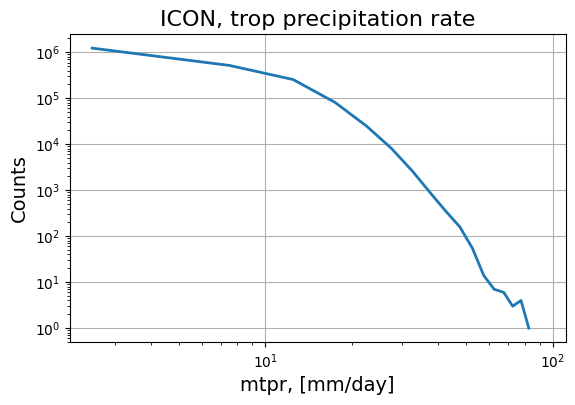

In [31]:
diag.histogram_plot(hist_icon, pdf=False, figsize=0.8, smooth=True,
               xlogscale = True, ylogscale=True, plot_title = "ICON, trop precipitation rate")

##### 3.1.2 Histogram of counts with a `step` line style (`step = True`)

({<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='mtpr, [mm/day]', ylabel='Counts'>,
  <Figure size 640x400 with 1 Axes>},
 '/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/trop_rainfall__counts_histogram.pdf')

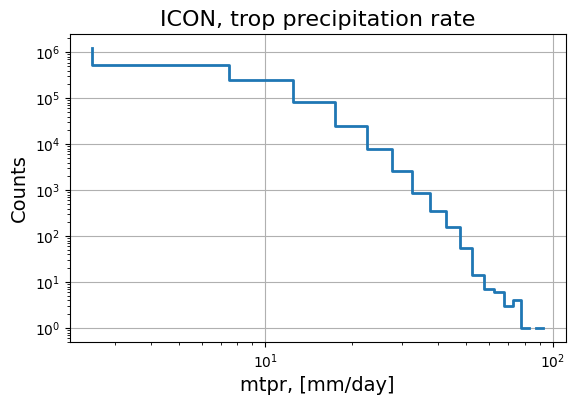

In [25]:
diag.histogram_plot(hist_icon, pdf=False, smooth=False, step = True, figsize=0.8, 
               xlogscale = True, ylogscale=True, plot_title = "ICON, trop precipitation rate")

### 3.2 Saving the figure in the storage 

({<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='mtpr, [mm/day]', ylabel='PDF'>,
  <Figure size 560x350 with 1 Axes>},
 './any_path_any_name.pngtrop_rainfall__PDF_histogram.pdf')

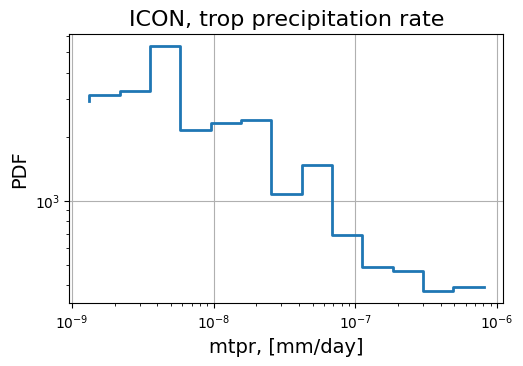

In [26]:
diag.histogram_plot(hist_icon_trop_logspaced, figsize=0.7, 
                    xlogscale = True, ylogscale=True,  
                    plot_title = "ICON, trop precipitation rate",
                    path_to_pdf='./any_path_any_name.png')

### 3.3 Plotting the histogram of counts, frequency, and pdf

##### Histogram of counts (`frequency=False, pdf = False`)

({<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='mtpr, [mm/day]', ylabel='Counts'>,
  <Figure size 640x400 with 1 Axes>},
 '/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/trop_rainfall__counts_histogram.pdf')

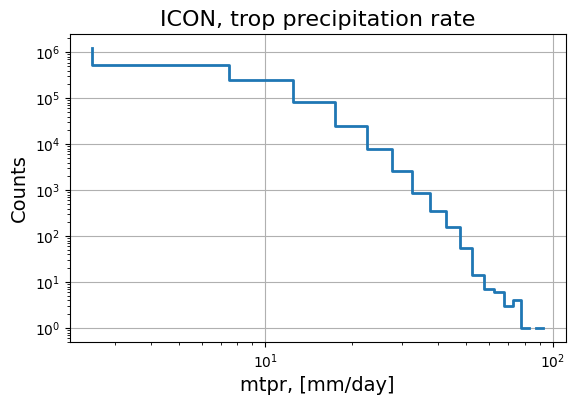

In [27]:
diag.histogram_plot(hist_icon, frequency=False, pdf = False,  figsize=0.8, 
                    xlogscale = True, ylogscale=True, 
                    plot_title = "ICON, trop precipitation rate")

##### Histogram of frequency (`frequency=True, pdf=False`)

({<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='mtpr, [mm/day]', ylabel='Frequency'>,
  <Figure size 640x400 with 1 Axes>},
 '/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/trop_rainfall__frequency_histogram.pdf')

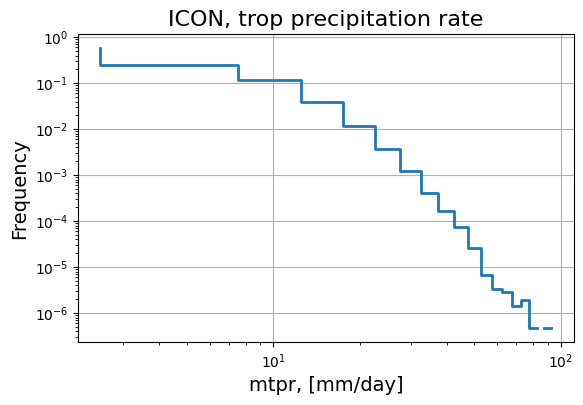

In [28]:
diag.histogram_plot(hist_icon, frequency=True, pdf = False, figsize=0.8, 
                    xlogscale = True, ylogscale=True, plot_title = "ICON, trop precipitation rate")

##### Histogram of pdf (`pdf=True`, also it is a default argument)

({<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='mtpr, [mm/day]', ylabel='PDF'>,
  <Figure size 640x400 with 1 Axes>},
 '/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/trop_rainfall__PDF_histogram.pdf')

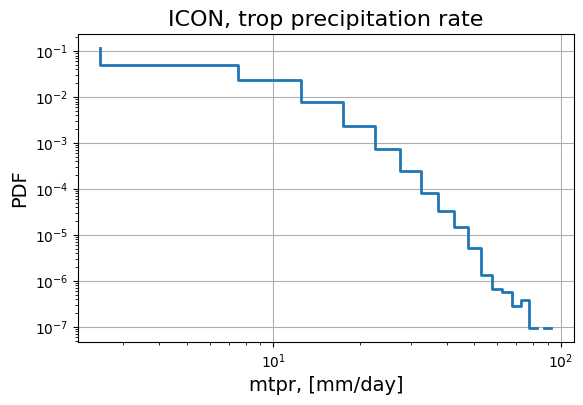

In [29]:
diag.histogram_plot(hist_icon, pdf = True, figsize=0.8, 
                    xlogscale = True, ylogscale=True, plot_title = "ICON, trop precipitation rate")

[Back to the top of file](#structure)

#

##### The end